In [140]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ipypb import irange
%matplotlib inline

In [101]:
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
print((major_ver, minor_ver, subminor_ver) )

('4', '1', '1')


In [102]:
cap = cv2.VideoCapture('bohemian_rhapsody_live_aid.mp4')

In [103]:
total_frames = cap.get(7)

In [104]:
total_frames

10885.0

In [105]:
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)

59.94005994005994


In [106]:
total_frames/60

181.41666666666666

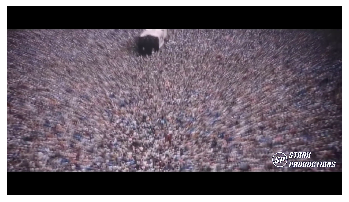

In [107]:
cap.set(1, 600)
ret, frame = cap.read()

RGB_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(RGB_frame)
plt.show()

In [127]:
def show_2_figs(frame1, frame2, figsize=20):
    fig = plt.figure(figsize=(figsize, figsize))
    ax1 = fig.add_subplot(2,2,1)
    
    RGB_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    RGB_past_frame = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
    
    ax1.imshow(RGB_past_frame)
    ax1.axis('off')
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(RGB_frame)
    ax2.axis('off')
    
    plt.show()

In [109]:
def show_frames(index, figsize=20):
    fig = plt.figure(figsize=(figsize, figsize))
    ax1 = fig.add_subplot(2,2,1)
    
    cap.set(1, i)
    _, frame = cap.read()
    
    cap.set(1, i - 2 * w + 1)
    ret, past_frame = cap.read()
    
    RGB_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    RGB_past_frame = cv2.cvtColor(past_frame, cv2.COLOR_BGR2RGB)
    
    ax1.imshow(RGB_past_frame)
    ax1.axis('off')
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(RGB_frame)
    ax2.axis('off')

In [110]:
# show_frames(13)
# show_frames(50)

In [114]:
import math

def diff_color(img, i, j, m, n):
    return (int(np.linalg.norm(img[i][j] - img[m][n])) > 0)

def calc_global_histogram(img):
    lines = img.shape[0]
    cols = img.shape[1]
    
    max_size = 256
    histogram_red = np.zeros(max_size)
    histogram_green = np.zeros(max_size)
    histogram_blue = np.zeros(max_size)
    
    for i in range(0, lines):
        for j in range(0, cols):
            blue = img[i][j][0]
            red = img[i][j][2]
            green = img[i][j][1]

            histogram_blue[blue] += 1
            histogram_red[red] += 1
            histogram_green[green] += 1
    
    histogram_total = list(histogram_red) + list(histogram_green) + list(histogram_blue)
      
    return histogram_total

def array_to_log(arr):
    return np.array([x if x <= 1 else math.log2(x) for x in arr])

def global_histogram(images):
    npixels = images[0].shape[0] * images[0].shape[1]

    hist1 = [x / npixels for x in calc_global_histogram(images[0])]
    hist2 = [x / npixels for x in calc_global_histogram(images[1])]
    
    return np.absolute(array_to_log(hist1) - array_to_log(hist2)).sum() / 2

In [ ]:

for i in irange(1, 10, 2): # same as range(1, 10, 2) but with progressbar
    # <do stuff>
    ...

In [ ]:
w = 30

frames_global_hist = {}
global_hist_diff = []

for i in irange(w + 3000 + 1, int(total_frames), 2 * w + 1):
    past_index = i - 2 * w + 1
    
    cap.set(1, i)
    _, frame = cap.read()
    cap.set(1, past_index)
    _, past_frame = cap.read()
    
    width, height, channels = frame.shape
    npixels = width * height * channels
    
    if past_index not in frames_global_hist.keys():
        frames_global_hist[past_index] = np.array(calc_global_histogram(past_frame)) / npixels
    
    if i not in frames_global_hist.keys():
        frames_global_hist[i] = np.array(calc_global_histogram(frame)) / npixels
    
    diff =  np.absolute(array_to_log(frames_global_hist[past_index]) - array_to_log(frames_global_hist[i])).sum() / 2
    
    global_hist_diff.append({
        "diff": diff,
        "past_index": past_index,
        "actual_index": i,
        "past_frame": past_frame,
        "actual_frame": frame,
    })

 [████████####################################################] 18/129 [04:45<00:15, 15.81s/it]

In [138]:
len(global_hist_diff)

16

Frame index: 3031
Diff global hist: 0.090654095936214


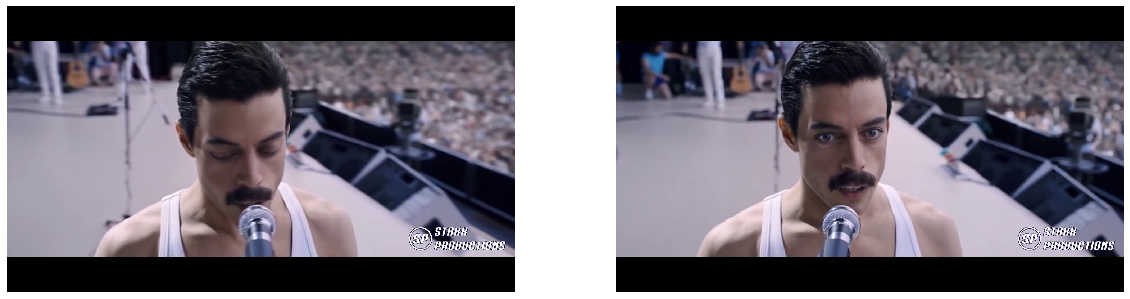

Frame index: 3092
Diff global hist: 0.09854697145061728


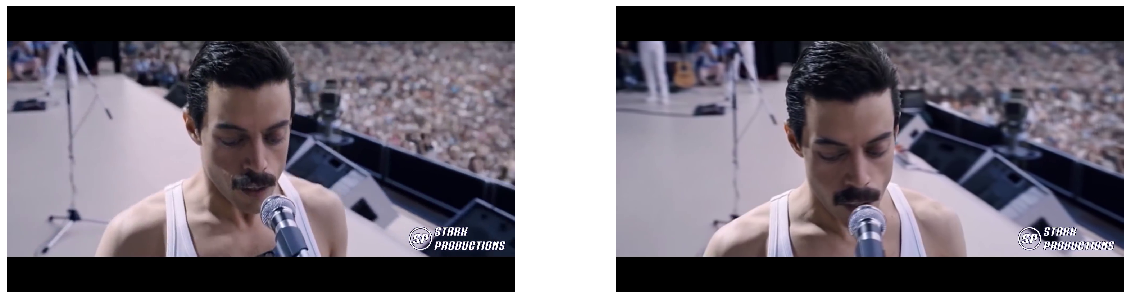

Frame index: 3153
Diff global hist: 0.11907423482510289


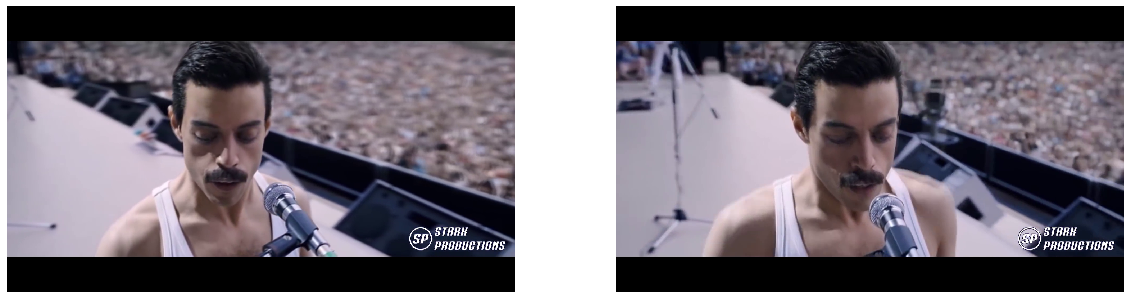

Frame index: 3214
Diff global hist: 0.08143936471193414


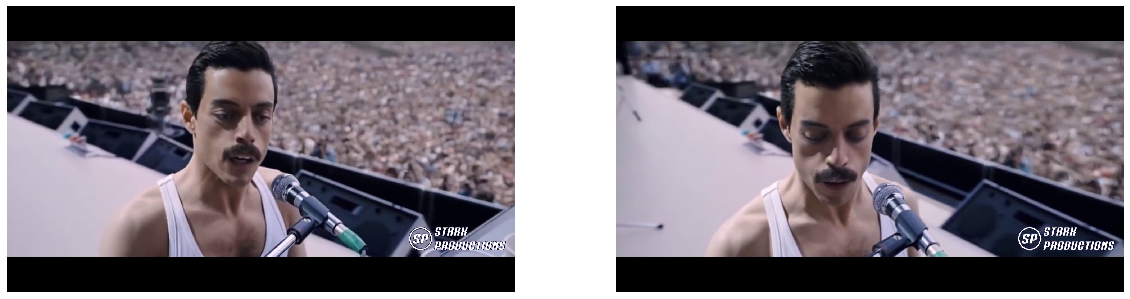

Frame index: 3275
Diff global hist: 0.0660593492798354


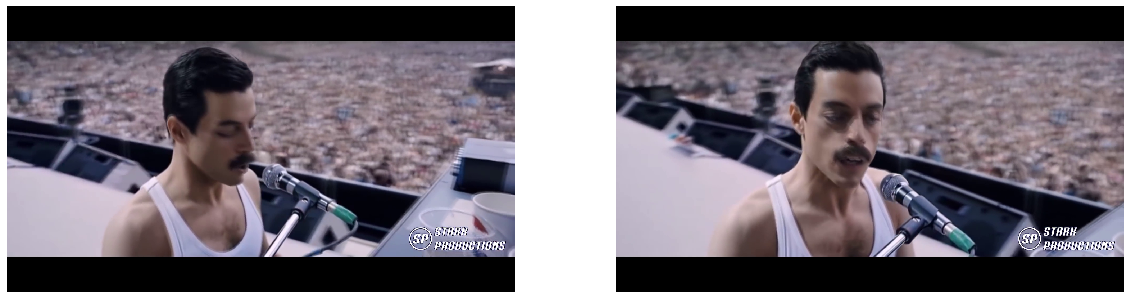

Frame index: 3336
Diff global hist: 0.08995547196502057


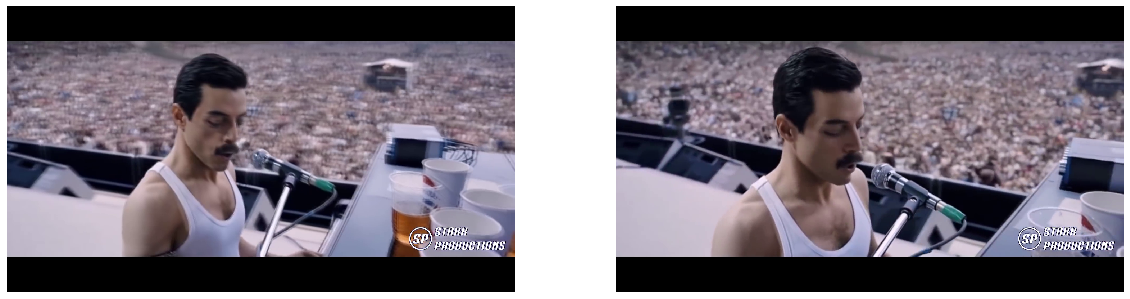

Frame index: 3397
Diff global hist: 0.06793579603909466


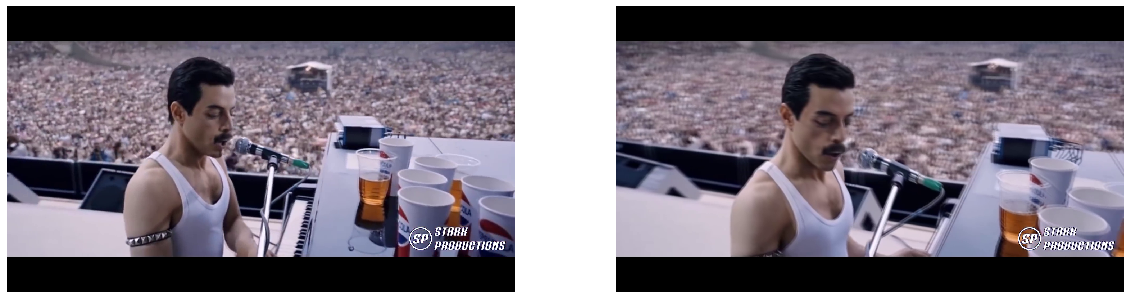

Frame index: 3458
Diff global hist: 0.054960455246913585


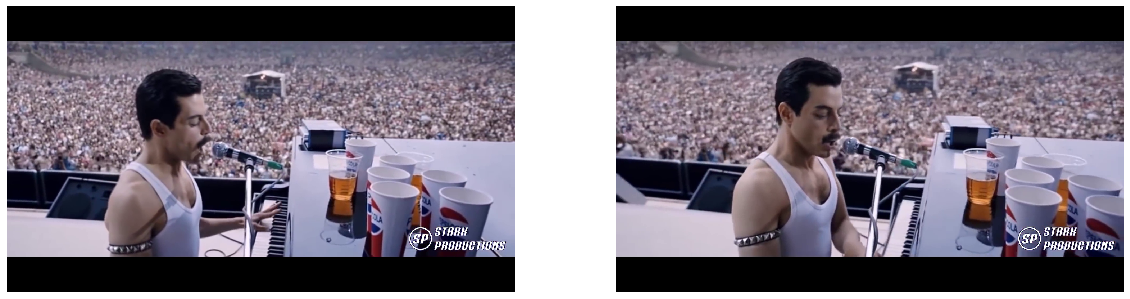

Frame index: 3519
Diff global hist: 0.03851498199588478


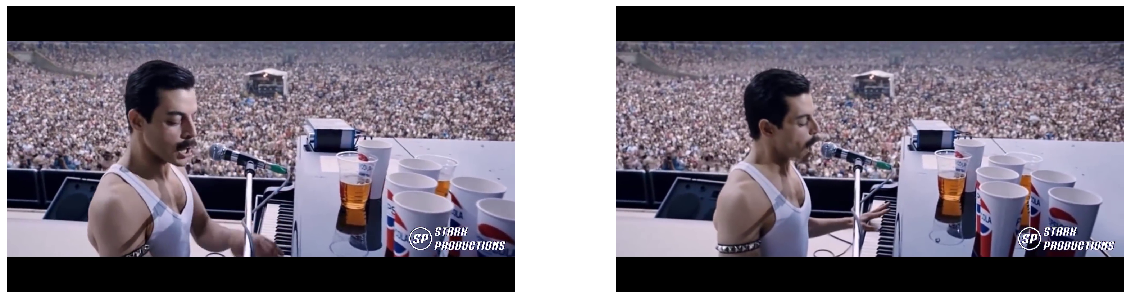

Frame index: 3580
Diff global hist: 0.03248472865226337


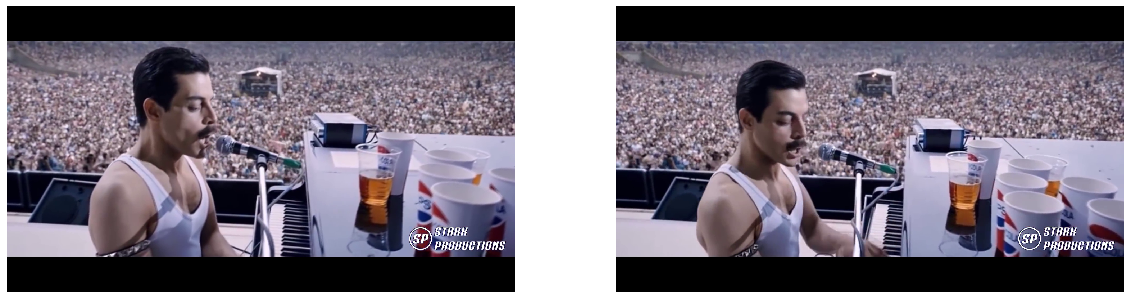

Frame index: 3641
Diff global hist: 0.037497267232510303


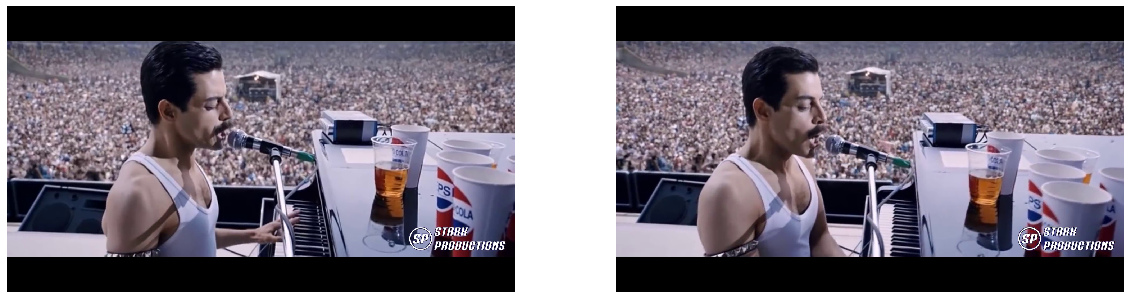

Frame index: 3702
Diff global hist: 0.036505594135802476


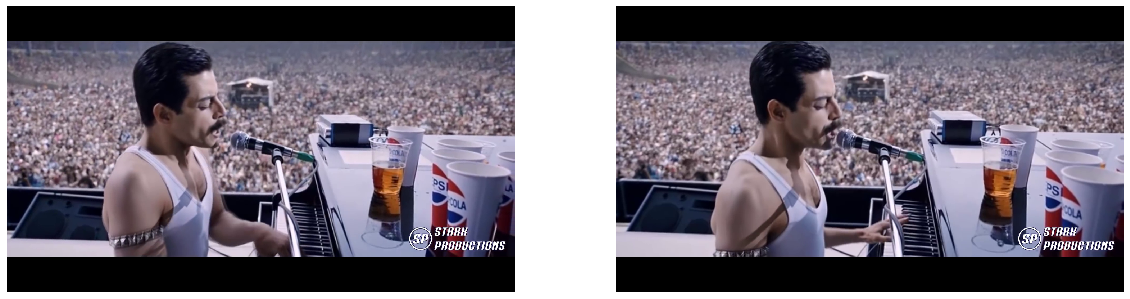

Frame index: 3763
Diff global hist: 0.030268293467078183


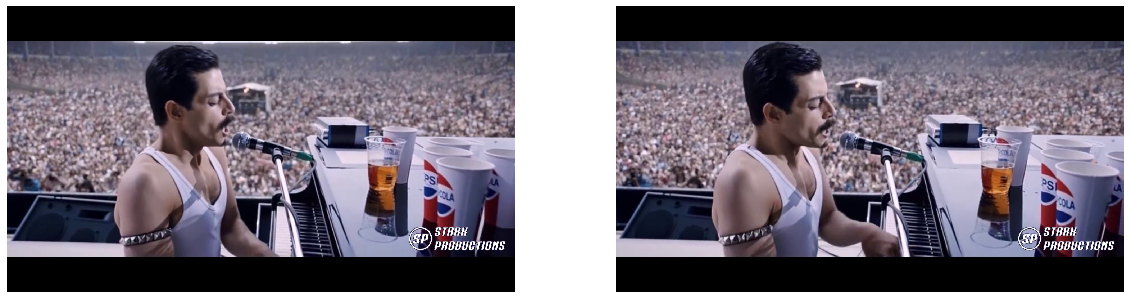

Frame index: 3824
Diff global hist: 0.032972447273662546


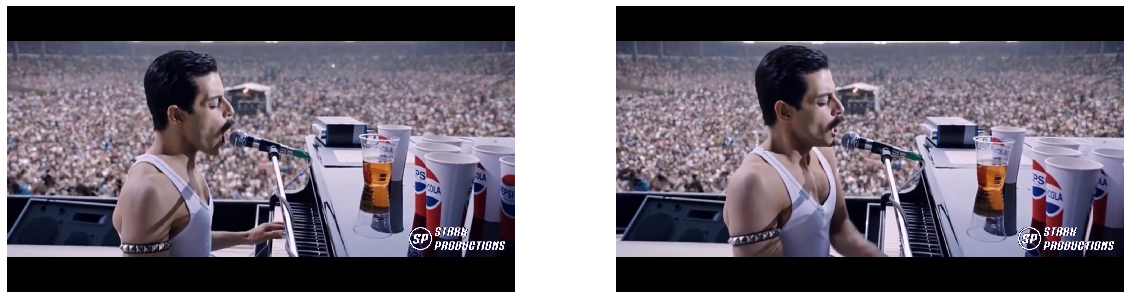

Frame index: 3885
Diff global hist: 0.03227864583333334


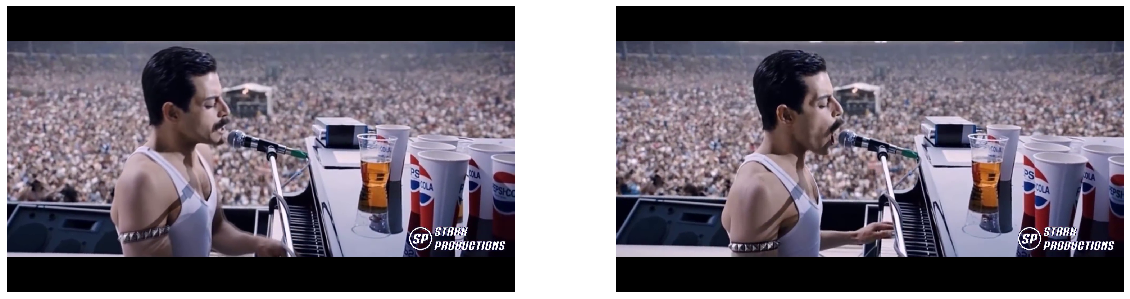

Frame index: 3946
Diff global hist: 0.02825569058641976


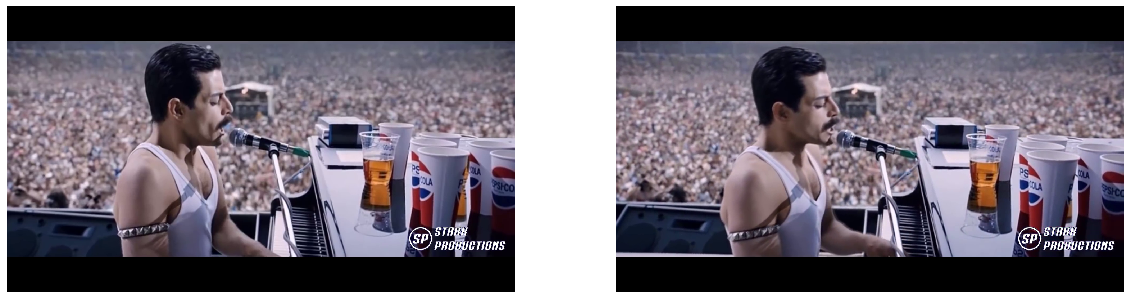

In [139]:
for element in global_hist_diff:
    print(f'Frame index: {element["actual_index"]}')
    print(f'Diff global hist: {element["diff"]}')
    show_2_figs(element['past_frame'], element['actual_frame'])